In [2]:
import pandas as pd
import matplotlib.pyplot as plt


bitcoin_users_file = "/Users/michal/Downloads/bitcoin.stackexchange.com/Users.xml"
cardano_users_file = "/Users/michal/Downloads/cardano.stackexchange.com/Users.xml"
solana_users_file = "/Users/michal/Downloads/solana.stackexchange.com/Users.xml"
ethereum_users_file = "/Users/michal/Downloads/ethereum.stackexchange.com/Users.xml"



In [3]:
df_users_btc = pd.read_xml(bitcoin_users_file)
df_users_ada = pd.read_xml(cardano_users_file)
df_users_sol = pd.read_xml(solana_users_file)
df_users_eth = pd.read_xml(ethereum_users_file)

df_users_btc["CreationDate"] = pd.to_datetime(df_users_btc["CreationDate"])
df_users_btc["LastAccessDate"] = pd.to_datetime(df_users_btc["LastAccessDate"])

df_users_ada["CreationDate"] = pd.to_datetime(df_users_ada["CreationDate"])
df_users_ada["LastAccessDate"] = pd.to_datetime(df_users_ada["LastAccessDate"])

df_users_sol["CreationDate"] = pd.to_datetime(df_users_sol["CreationDate"])
df_users_sol["LastAccessDate"] = pd.to_datetime(df_users_sol["LastAccessDate"])

df_users_eth["CreationDate"] = pd.to_datetime(df_users_eth["CreationDate"])
df_users_eth["LastAccessDate"] = pd.to_datetime(df_users_eth["LastAccessDate"])
df_users_ada


,Id,Reputation,CreationDate,DisplayName,LastAccessDate,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,WebsiteUrl
0,-1,1,2018-02-20 21:07:06.207,Community,2018-02-20 21:07:06.207,on the server farm,"<p>Hi, I'm not really a person.</p>\r\n<p>I'm ...",18,0,216,-1,None
1,1,101,2021-04-27 14:50:43.050,Adam Lear,2023-11-20 23:00:38.940,"New York, NY",\n<p>Developer at Stack Overflow focusing on p...,17,0,0,37099,None
2,2,101,2021-04-27 14:51:44.817,Kyle Pollard,2022-09-27 22:34:23.420,"British Columbia, Canada",<p> Hi there! I'm Kyle Pollard. I'm in beautif...,8,0,0,3625223,None
3,3,101,2021-04-27 14:51:46.723,Catija,2023-07-20 19:51:18.137,Texas,"<p>From July 2018 until October 2023, I was a ...",13,1,0,3979517,None
4,4,1,2021-04-27 14:56:04.460,tSs,2022-04-23 21:47:37.080,None,<p>I like to program and analyze and build</p>\n,10,1,0,220662,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8132,10201,1,2023-12-01 15:58:07.360,優品磚會 Atiles.hk,2023-12-01 15:58:07.360,"Wan Chai, Hong Kong",<p>優品磚會 - 金意陶KITO 香港總代理，一間提供優質磁磚予顧客的公司，分店為於灣仔、...,0,0,0,30041683,None
8133,10202,1,2023-12-01 16:28:41.840,Nicolás Arias,2023-12-01 22:12:03.580,None,None,0,0,0,20574456,None
8134,10203,1,2023-12-01 17:52:17.203,Giamia Gaitan,2023-12-01 17:52:17.203,None,None,0,0,0,25161699,None
8135,10204,1,2023-12-02 04:34:57.850,Roberto Lopez,2023-12-02 04:34:57.850,Spain,<p>Mundo-excel is a website where you will fin...,0,0,0,30044858,https://mundo-excel.com


36.259800965018094
1.0


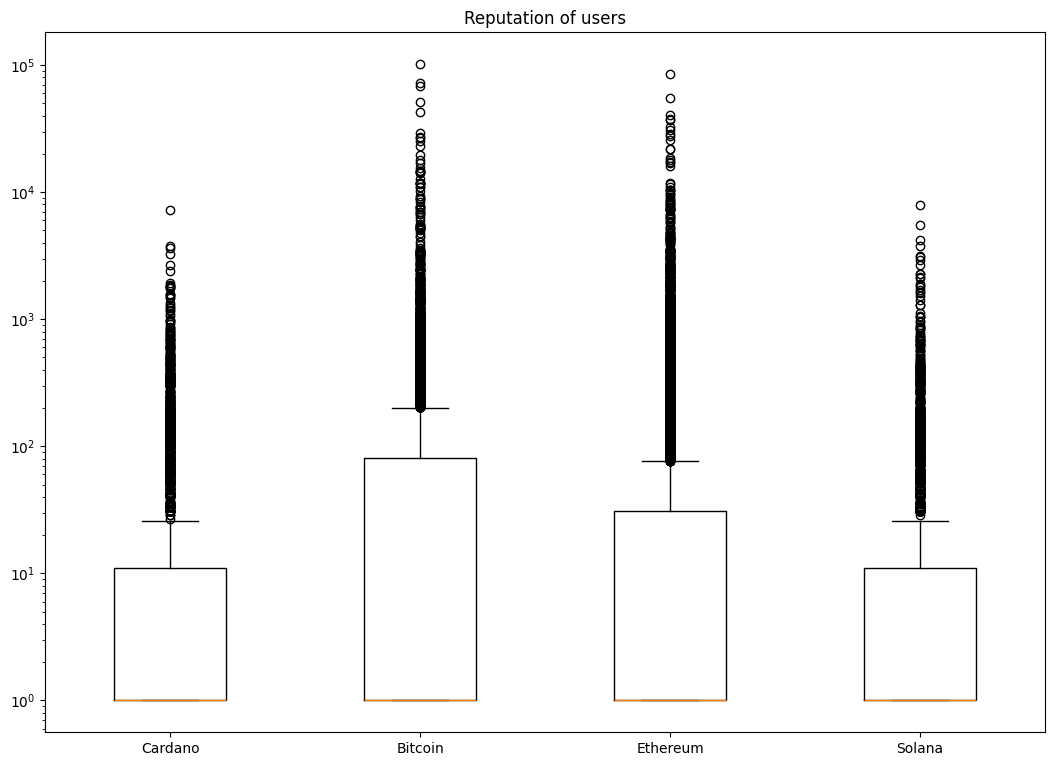

In [103]:
import numpy as np
import seaborn as sns

repSol = df_users_sol["Reputation"]
repBtc = df_users_btc["Reputation"]
repEth = df_users_eth["Reputation"]
repAda = df_users_ada["Reputation"]
max(repSol)
mean_rep = np.mean(repSol)
print(mean_rep)
median_rep = np.median(repSol)
print(median_rep)

# box = rep.plot.box()
data = [repAda, repBtc, repEth, repSol]
# sns.boxplot(data=allData)
# plt.boxplot(repSol)

# plt.yscale('log')

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['Cardano', 'Bitcoin', 'Ethereum', 'Solana'])
 
plt.yscale('log')
plt.title("Reputation of users")
# show plot
plt.show()


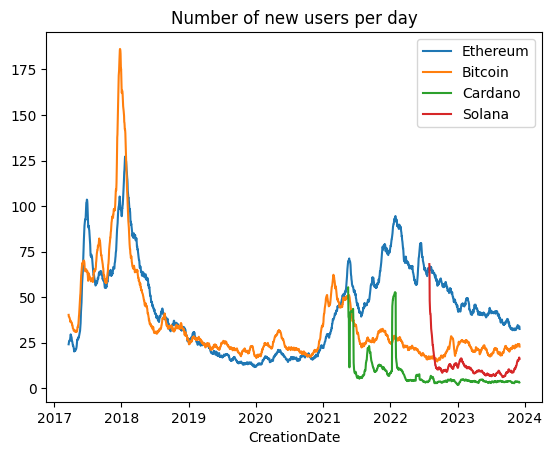

In [8]:
# Filter the dataframe based on the desired date range
start_date = '2017-03-01'
users_btc = df_users_btc[(df_users_btc['CreationDate'] >= start_date)]
users_eth= df_users_eth[(df_users_eth['CreationDate'] >= start_date)]
users_ada = df_users_ada[(df_users_ada['CreationDate'] >= start_date)]
users_sol = df_users_sol[(df_users_sol['CreationDate'] >= start_date)]

creationDateGroupedBtc = users_btc.groupby(users_btc['CreationDate'].dt.date).size()

creationDateGroupedEth = users_eth.groupby(users_eth['CreationDate'].dt.date).size()
creationDAteGroupedAda = users_ada.groupby(users_ada['CreationDate'].dt.date).size()
creationDateGroupedSol = users_sol.groupby(users_sol['CreationDate'].dt.date).size()





window_size = 20

rolling_mean_eth_users = creationDateGroupedEth.rolling(window_size).mean()
rolling_mean_eth_users.plot(label="Ethereum")
rolling_mean_btc_users = creationDateGroupedBtc.rolling(window_size).mean()
rolling_mean_btc_users.plot(label="Bitcoin")
rolling_mean_ada_users = creationDAteGroupedAda.rolling(window_size).mean()
rolling_mean_ada_users.plot(label="Cardano")
rolling_mean_sol_users = creationDateGroupedSol.rolling(window_size).mean()
rolling_mean_sol_users.plot(label="Solana")
plt.title('Number of new users per day')

plt.legend()


In [47]:
minUsersCreatedBtc = creationDateGroupedBtc.min()
maxUsersCreatedBtc = creationDateGroupedBtc.max()
differenceInCreatedUsersBtc = maxUsersCreatedBtc - minUsersCreatedBtc

# minPriceEth = eth_historical['Open'].min()
# maxPriceEth = eth_historical['Open'].max()
# differencePriceEth = maxPriceEth - minPriceEth
# bitcoin_historical_zeroONe = bitcoin_historical.copy()["priceZeroOne"] == (bitcoin_historical["price"]-minPrice)/differencePrice
differenceInCreatedUsersBtc = (creationDateGroupedBtc.values - minUsersCreatedBtc) / differenceInCreatedUsersBtc
# eth_historical['priceZero'] = (eth_historical['Open'] - minPriceEth) / differencePriceEth


window_size = 20
# rolling_mean_eth = creationDateGroupedEth.rolling(window_size).mean()
# rolling_mean_eth.plot()
rolling_mean_btc_users = differenceInCreatedUsersBtc.rolling(window_size).mean()
rolling_mean_btc_users.plot()


AttributeError: 'numpy.ndarray' object has no attribute 'rolling'

<Axes: xlabel='Date', ylabel='$'>

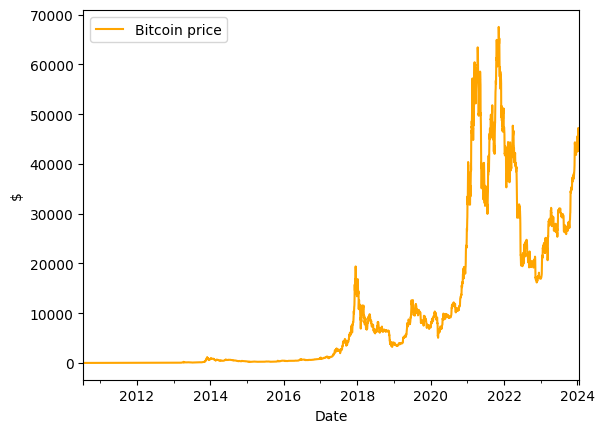

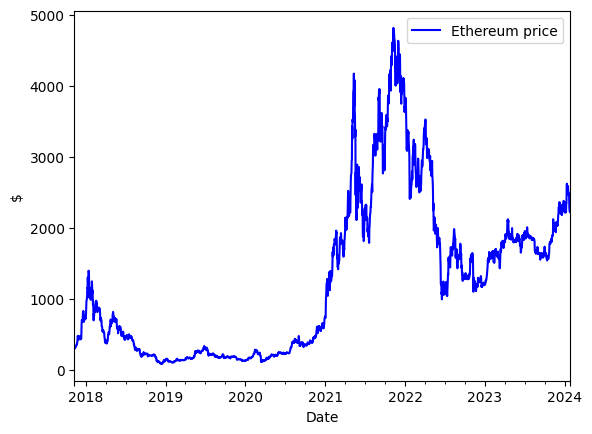

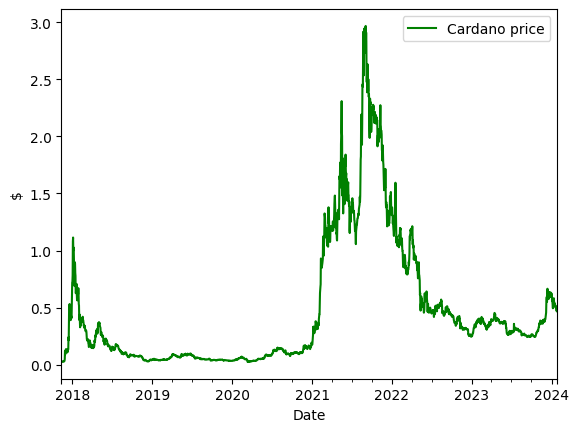

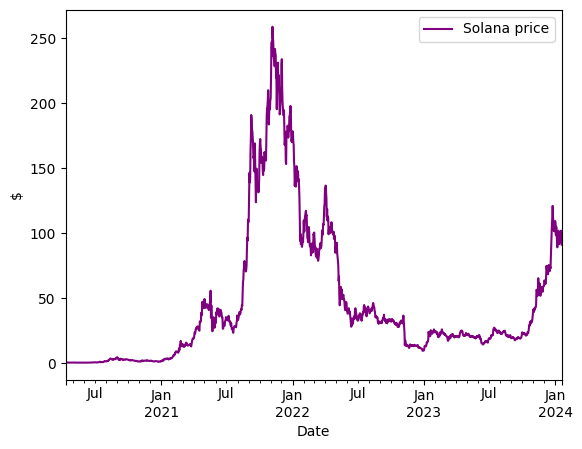

In [24]:
start_date = '2017-11-11'

bitcoin_historical = pd.read_csv("./historical_prices/bitcoin_data.csv")

bitcoin_historical['Time'] = pd.to_datetime(bitcoin_historical['Time'])
# bitcoin_historical = bitcoin_historical[bitcoin_historical['Time'] >= start_date]

bitcoin_historical['Derivative'] = bitcoin_historical['price'].diff()
bitcoin_historical['RelativeChange'] = bitcoin_historical['Derivative']/(bitcoin_historical['price'].rolling(20).mean())
bitcoin_historical.plot(x='Time', y='price', kind='line', label="Bitcoin price", color="orange", ylabel="$", xlabel="Date")


eth_historical = pd.read_csv("./historical_prices/ETH-USD.csv")


eth_historical['Date'] = pd.to_datetime(eth_historical['Date'])
# eth_historical = eth_historical[eth_historical['Date'] >= start_date]
eth_historical['Derivative'] = eth_historical['Close'].diff()
eth_historical['RelativeChange'] = eth_historical['Derivative']/(eth_historical['Close'].rolling(20).mean())
eth_historical.plot(x='Date', y='Close', kind='line', label="Ethereum price", color="blue", ylabel="$", xlabel="Date")


ada_historical = pd.read_csv("./historical_prices/ADA-USD.csv")
ada_historical['Date'] = pd.to_datetime(ada_historical['Date'])
ada_historical = ada_historical[ada_historical['Date'] >= start_date]
ada_historical['Derivative'] = ada_historical['Close'].diff()
ada_historical['RelativeChange'] = ada_historical['Derivative']/(ada_historical['Close'].rolling(20).mean())
ada_historical.plot(x='Date', y='Close', kind='line', label="Cardano price", color = "green", ylabel="$", xlabel="Date")

sol_historical = pd.read_csv("./historical_prices/SOL-USD.csv")
sol_historical['Date'] = pd.to_datetime(sol_historical['Date'])
sol_historical = sol_historical[sol_historical['Date'] >= start_date]
sol_historical['Derivative'] = sol_historical['Close'].diff()
sol_historical['RelativeChange'] = sol_historical['Derivative']/(sol_historical['Close'].rolling(20).mean())
sol_historical.plot(x='Date', y='Close', kind='line', label="Solana price", color="purple", ylabel="$", xlabel="Date")


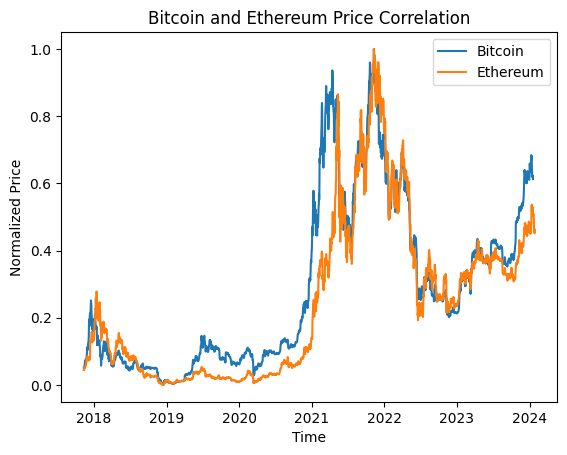

In [36]:
minPriceBtc = bitcoin_historical['price'].min()
maxPriceBtc = bitcoin_historical['price'].max()
differencePriceBtc = maxPriceBtc - minPriceBtc

minPriceEth = eth_historical['Open'].min()
maxPriceEth = eth_historical['Open'].max()
differencePriceEth = maxPriceEth - minPriceEth
# bitcoin_historical_zeroONe = bitcoin_historical.copy()["priceZeroOne"] == (bitcoin_historical["price"]-minPrice)/differencePrice
bitcoin_historical['priceZero'] = (bitcoin_historical['price'] - minPriceBtc) / differencePriceBtc
eth_historical['priceZero'] = (eth_historical['Open'] - minPriceEth) / differencePriceEth

# bitcoin_historical.plot(x='Time', y='priceZero', kind='line', title="Bitcoin price")
# eth_historical.plot(x='Date', y='priceZero', kind='line', title="Ethereum price")

import matplotlib.pyplot as plt

plt.plot(bitcoin_historical['Time'], bitcoin_historical['priceZero'], label='Bitcoin')
plt.plot(eth_historical['Date'], eth_historical['priceZero'], label='Ethereum')
plt.plot
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title('Bitcoin and Ethereum Price Correlation')
plt.legend()
plt.show()


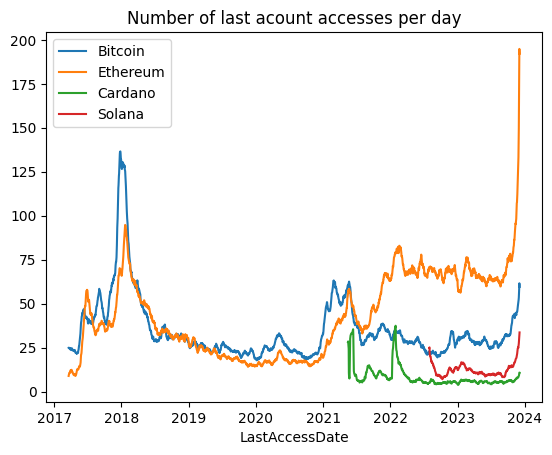

In [11]:
creationDateGroupedBtc = users_btc.groupby(users_btc['CreationDate'].dt.date).size()
lastAccessDateGroupedBtc = users_btc.groupby(users_btc['LastAccessDate'].dt.date).size()

window_size = 20
# rolling_mean_eth = creationDateGroupedEth.rolling(window_size).mean()
# rolling_mean_eth.plot()
rolling_users_last_access_btc = lastAccessDateGroupedBtc.rolling(window_size).mean()
rolling_users_last_access_btc.plot(label='Bitcoin')

creationDateGroupedEth = users_eth.groupby(users_eth['CreationDate'].dt.date).size()
lastAccessDateGroupedEth = users_eth.groupby(users_eth['LastAccessDate'].dt.date).size()
rolling_users_last_access_eth = lastAccessDateGroupedEth.rolling(window_size).mean()
rolling_users_last_access_eth.plot(label='Ethereum')

creationDateGroupedAda = users_ada.groupby(users_ada['CreationDate'].dt.date).size()
lastAccessDateGroupedAda = users_ada.groupby(users_ada['LastAccessDate'].dt.date).size()
rolling_users_last_access_ada = lastAccessDateGroupedAda.rolling(window_size).mean()
rolling_users_last_access_ada.plot(label='Cardano')

creationDateGroupedSol = users_sol.groupby(users_sol['CreationDate'].dt.date).size()
lastAccessDateGroupedSol = users_sol.groupby(users_sol['LastAccessDate'].dt.date).size()
rolling_users_last_access_sol = lastAccessDateGroupedSol.rolling(window_size).mean()
rolling_users_last_access_sol.plot(label='Solana')


plt.title('Number of last acount accesses per day')

plt.legend()



In [7]:
plt.pie(df_users_btc['Location'].value_counts(), labels=df_users_btc['Location'].value_counts().index.tolist())
 
# show plot
plt.show()



/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/

ValueError: 
$$F^{A^{R^{R^{R^{R^{A^{W^{A^{Y}}}}}}}}}$$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 640x480 with 1 Axes>